In [1]:
import pandas as pd
import seaborn as sns

# Exercice 1

In [50]:
def get_aggregate_analysis(ants, path):
    path_one_battery_of_test = f"{path}_ants_{ants}_run"

    all_dfs = []
    for i in range(20):
        current_df = pd.read_csv(f"{path_one_battery_of_test}_{i}.csv")
        current_df["run"] = i
        all_dfs.append(current_df)
    concatenated_df = pd.concat(all_dfs)
    #concatenated_df["tours"] = concatenated_df["tours"]//ants
    mean_best_length_per_tours = concatenated_df.groupby("tours")["best_length"].mean().reset_index()
    repartition_of_best_length = concatenated_df.groupby("run")["best_length"].min().reset_index()
    return mean_best_length_per_tours, repartition_of_best_length



In [51]:
def compute_all_analysis(ants_range, path):
    mean_list= []
    min_list = []
    for ants in ants_range:
        mean, min = get_aggregate_analysis(ants, path)
        mean["ants"] = ants
        min["ants"] = ants
        mean_list.append(mean)
        min_list.append(min)
    return {
        "mean" : pd.concat(mean_list),
        "min" : pd.concat(min_list)
    }


In [52]:
path = f"results/ulysses22"

In [53]:
ants_tests= {}

In [54]:
ants_tests["ulysses22"] = compute_all_analysis([2,5,10,20,50,100], path)
path = f"results/att532"
ants_tests["att532"]= compute_all_analysis([2, 5, 10, 20, 50, 100], path)
sns.set_theme()

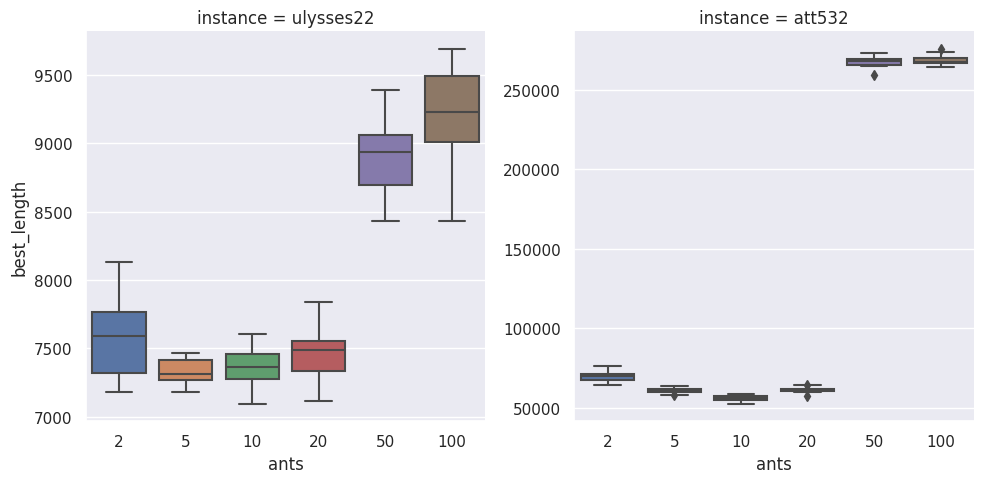

In [56]:
ants_tests["ulysses22"]["min"]["instance"] = "ulysses22"
ants_tests["att532"]["min"]["instance"] = "att532"

sns.catplot(
    data=pd.concat([ants_tests["ulysses22"]["min"], ants_tests["att532"]["min"]]), x="ants", y="best_length",
    col="instance",
    kind="box", sharey=False
)

The two instances shares a similar pattern in terms of mean of best solution accross all run. Indeed from 2 to 10 we "fall" then we "climb" a bit and at 50 and 100 the values are way up high.

# Exercice 2
Alpha and Beta Convergence inspection

In [18]:
def get_aggregate_analysis_c_part(alpha, beta, path):
    path_one_battery_of_test = f"{path}_alpha_{alpha}_beta_{beta}_run"

    all_dfs = []
    for i in range(20):
        current_df = pd.read_csv(f"{path_one_battery_of_test}_{i}.csv")
        current_df["run"] = i
        all_dfs.append(current_df)
    concatenated_df = pd.concat(all_dfs)
    #concatenated_df["tours"] = concatenated_df["tours"]//ants
    mean_best_length_per_tours = concatenated_df.groupby("tours")["best_length"].mean().reset_index()

    repartition_of_best_length = concatenated_df.groupby("run")["best_length"].min().reset_index()
    return mean_best_length_per_tours, repartition_of_best_length



In [27]:
path = f"results/exo_4_c/att532"
#att532_mean, att532_min= get_aggregate_analysis_c_part(1,0, path)
def get_alpha_beta_comparison(path):
    alphas = [1,0]
    betas = [0, 1]
    current_test = {}
    mean_list= []
    min_list = []
    for i in range(2):
        current_test["mean"], current_test["min"] = get_aggregate_analysis_c_part(alphas[i], betas[i],path)
        current_test["mean"]["alpha-beta"] = f"alpha : {alphas[i]} - beta : {betas[i]}"
        current_test["min"]["alpha-beta"] = f"alpha : {alphas[i]} - beta : {betas[i]}"
        mean_list.append(current_test["mean"])
        min_list.append(current_test["min"])

    return {
         "mean" : pd.concat(mean_list),
         "min" : pd.concat(min_list)
     }

In [39]:
att532_alpha_beta = get_alpha_beta_comparison(path)
ulysses22_alpha_beta = get_alpha_beta_comparison(f"results/exo_4_c/ulysses22")

In [40]:
att532_alpha_beta["mean"]["instance"] = "att532"
ulysses22_alpha_beta["mean"]["instance"] = "ulysses22"

Previous convergence with alpha and beta = 1

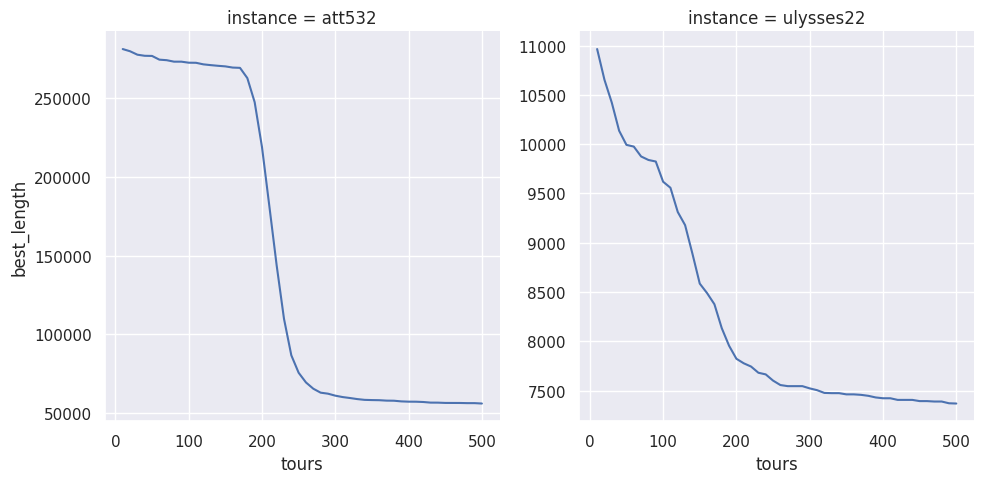

In [60]:
ants_tests["att532"]["mean"]["instance"] = "att532"
ants_tests["ulysses22"]["mean"]["instance"] = "ulysses22"
sns.relplot(pd.concat([ants_tests["att532"]["mean"].query("ants == 10"), ants_tests["ulysses22"]["mean"].query("ants == 10")]), x="tours", y="best_length", col="instance", kind="line", facet_kws={'sharey': False, 'sharex': True})

Current convergence with the test of alpha and beta

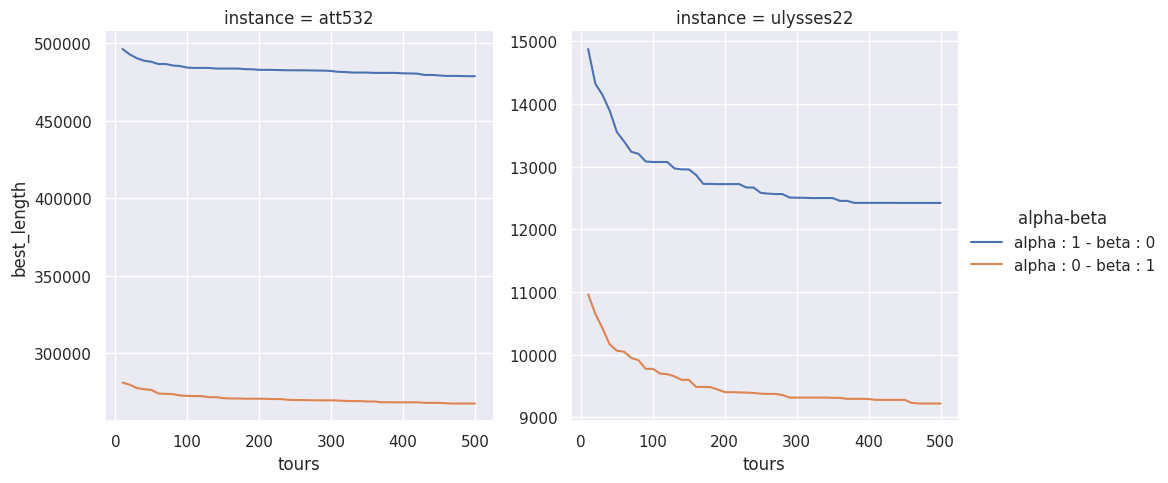

In [49]:
sns.relplot(pd.concat([att532_alpha_beta["mean"], ulysses22_alpha_beta["mean"]]), x="tours", y="best_length",  hue="alpha-beta", col="instance", kind="line", facet_kws={'sharey': False, 'sharex': True})

Alpha of 0 and beta 1 gives us much better performance than alpha 1 and beta 0. This can be explained by the fact that alpha increase the importance of pheromone, so if alpha is 1 and beta is 0, we do not use the heuristic information to improve the process. On the other putting beta to one only to use pure heurisitc informantions but this lead to convergence and inability to escape local optimal. At best we get 9200 while previously, the ant with alpha=beta=1 had around 7400.
However the slope is relatively similar


# Exercice 3 (e)
Rho goes bruh

In [7]:
def get_aggregate_analysis_rho(rho, path):
    path_one_battery_of_test = f"{path}_rho_{rho}_run"

    all_dfs = []
    for i in range(20):
        current_df = pd.read_csv(f"{path_one_battery_of_test}_{i}.csv")
        current_df["run"] = i
        all_dfs.append(current_df)
    concatenated_df = pd.concat(all_dfs)
    #concatenated_df["tours"] = concatenated_df["tours"]//ants
    mean_best_length_per_tours = concatenated_df.groupby("tours")["best_length"].mean().reset_index()
    repartition_of_best_length = concatenated_df.groupby("run")["best_length"].min().reset_index()
    return mean_best_length_per_tours, repartition_of_best_length


def compute_all_analysis_rho(rho_range, path):
    mean_list = []
    min_list = []
    for rho in rho_range:
        mean, min = get_aggregate_analysis_rho(rho, path)
        mean["rho"] = rho
        min["rho"] = rho
        mean_list.append(mean)
        min_list.append(min)
    return {
        "mean": pd.concat(mean_list),
        "min": pd.concat(min_list)
    }




In [ ]:
path = f"results/exo_4_c/att532"

In [3]:
rhos = [0.01, 0.5, 0.7, 1]

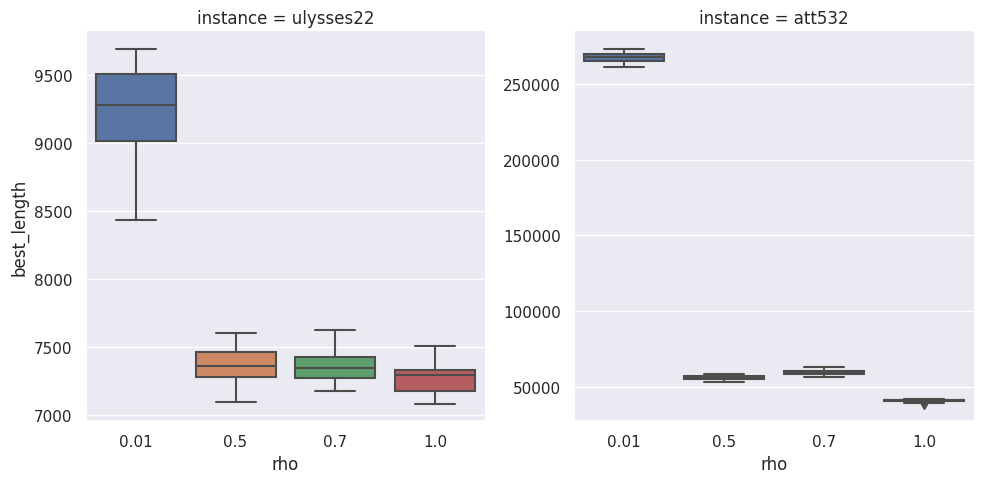

In [11]:
path_ulysse = f"results/exo_4_e/ulysses22"
path_att532 = f"results/exo_4_e/att532"
rho_tests = {}
rho_tests["ulysses22"] = compute_all_analysis_rho(rhos, path_ulysse)
rho_tests["att532"] = compute_all_analysis_rho(rhos, path_att532)
sns.set_theme()
rho_tests["ulysses22"]["min"]["instance"] = "ulysses22"
rho_tests["att532"]["min"]["instance"] = "att532"
rho_tests["ulysses22"]["mean"]["instance"] = "ulysses22"
rho_tests["att532"]["mean"]["instance"] = "att532"

sns.catplot(
    data=pd.concat([rho_tests["ulysses22"]["min"], rho_tests["att532"]["min"]]), x="rho", y="best_length",
    col="instance",
    kind="box", sharey=False
)

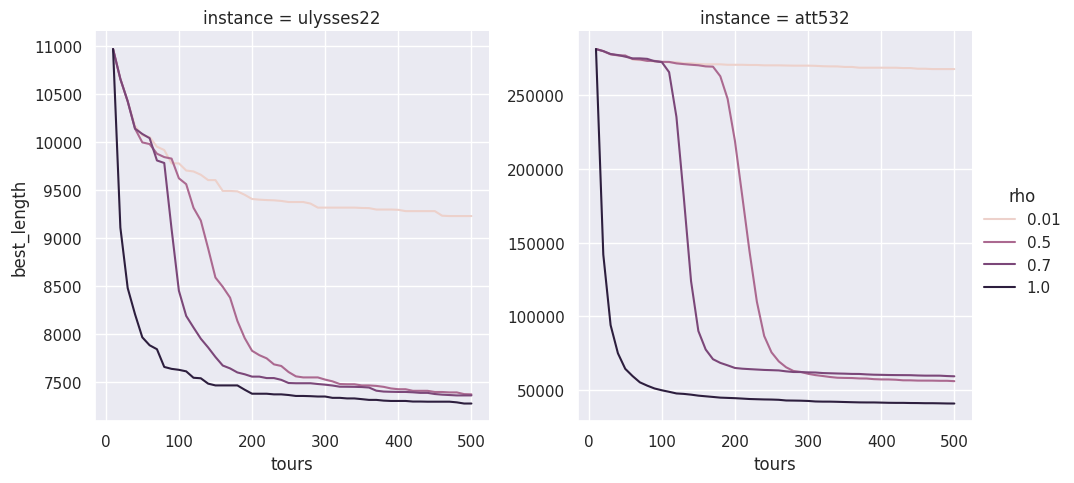

In [12]:
sns.relplot(
    data=pd.concat([rho_tests["ulysses22"]["mean"], rho_tests["att532"]["mean"]]), x="tours", y="best_length",
    col="instance", hue="rho",
    kind="line",facet_kws={'sharey': False, 'sharex': True}
)

We can see that the higher the rho, the best length we obtain (shortest path). A low rho will make the algorithm converges faster which is not surprising as the pheremone will not be forget and will exploit the shit of the already explored paths

## Exercice 4

Use now 20 particles in a star topology to evaluate the Rosenbrock func-
tion, on a budget of 50 iterations. Tune inertia, ψ1 and ψ2 coefficients to
find the values that give the best results.